# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0719 21:18:42.329917 12636 deprecation_wrapper.py:119] From C:\Users\apply\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0719 21:18:42.332372 12636 deprecation_wrapper.py:119] From C:\Users\apply\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 21:18:42.417304 12636 deprecation_wrapper.py:119] From C:\Users\apply\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 21:18:42.417304 12636 deprecation_wrapper.py:119] From C:\Users\apply\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeh

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0719 21:18:42.767140 12636 deprecation.py:323] From C:\Users\apply\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 268us/step - loss: 2.3771 - acc: 0.1342 - val_loss: 2.1250 - val_acc: 0.1828
Epoch 2/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.0863 - acc: 0.1806 - val_loss: 2.1070 - val_acc: 0.1584
Epoch 3/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.1437 - acc: 0.1650 - val_loss: 2.1600 - val_acc: 0.1553
Epoch 4/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.2438 - acc: 0.1387 - val_loss: 2.3206 - val_acc: 0.1014
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.3069 - acc: 0.1013 - val_loss: 2.3038 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.3044 - acc: 0.0995 - val_loss: 2.3045 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.3042 - acc: 0.0977 - val_loss: 2.3032 -

Epoch 2/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6039 - acc: 0.4306 - val_loss: 1.6518 - val_acc: 0.4007
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5108 - acc: 0.4649 - val_loss: 1.5734 - val_acc: 0.4441
Epoch 4/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.4429 - acc: 0.4908 - val_loss: 1.5284 - val_acc: 0.4638
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.3972 - acc: 0.5027 - val_loss: 1.4943 - val_acc: 0.4665
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.3603 - acc: 0.5168 - val_loss: 1.4993 - val_acc: 0.4621
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.3168 - acc: 0.5308 - val_loss: 1.4412 - val_acc: 0.4861
Epoch 8/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.2865 - acc: 0.5443 - val_loss: 1.3655 - val_acc: 0.5114
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 5s 104us/step - loss: 1.7419 - acc: 0.3880 - val_loss: 1.7199 - val_acc: 0.4016
Epoch 4/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.6772 - acc: 0.4125 - val_loss: 1.6607 - val_acc: 0.4178
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6282 - acc: 0.4303 - val_loss: 1.6141 - val_acc: 0.4345
Epoch 6/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5885 - acc: 0.4446 - val_loss: 1.5875 - val_acc: 0.4491
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5543 - acc: 0.4542 - val_loss: 1.5525 - val_acc: 0.4540
Epoch 8/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5246 - acc: 0.4653 - val_loss: 1.5366 - val_acc: 0.4601
Epoch 9/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.4967 - acc: 0.4754 - val_loss: 1.5154 - val_acc: 0.4691
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 105us/step - loss: 1.9962 - acc: 0.2922 - val_loss: 1.9742 - val_acc: 0.3011
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.9576 - acc: 0.3085 - val_loss: 1.9396 - val_acc: 0.3146
Epoch 6/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.9272 - acc: 0.3231 - val_loss: 1.9135 - val_acc: 0.3272
Epoch 7/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.9029 - acc: 0.3298 - val_loss: 1.8913 - val_acc: 0.3342
Epoch 8/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.8818 - acc: 0.3389 - val_loss: 1.8729 - val_acc: 0.3456
Epoch 9/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.8640 - acc: 0.3472 - val_loss: 1.8562 - val_acc: 0.3466
Epoch 10/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.8475 - acc: 0.3527 - val_loss: 1.8410 - val_acc: 0.3544
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 5s 106us/step - loss: 2.2209 - acc: 0.1997 - val_loss: 2.2136 - val_acc: 0.2033
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2069 - acc: 0.2073 - val_loss: 2.2003 - val_acc: 0.2085
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1936 - acc: 0.2157 - val_loss: 2.1875 - val_acc: 0.2170
Epoch 8/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1809 - acc: 0.2246 - val_loss: 2.1751 - val_acc: 0.2249
Epoch 9/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1685 - acc: 0.2316 - val_loss: 2.1629 - val_acc: 0.2326
Epoch 10/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1564 - acc: 0.2396 - val_loss: 2.1512 - val_acc: 0.2383
Epoch 11/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1447 - acc: 0.2443 - val_loss: 2.1399 - val_acc: 0.2476
Epoch 12/50
50000/50000 [==================

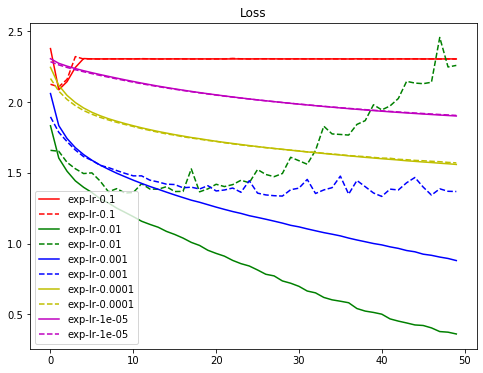

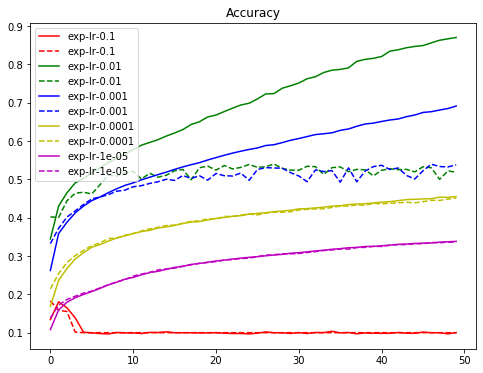

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


TypeError: Unexpected keyword argument passed to optimizer: nesterov

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.AdaGrad(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()